# Polynomial Regression

Given scalar measurements $t_1, \ldots, t_N$, known as dependent, endogenous, response, measured, criterion variable, or regressand or target. Each measurement depends on parameters we know $x_1, \ldots, x_N$. Let
\begin{equation}
f(x) = \sum_{m=0}^{M-1} c_m x^m,
\end{equation}
be an approximation to the underlying function generating the data. The $1, x, \ldots, x^{M-1}$ are known as independent, exogenous, input, explanatory, predictor variables or regressors.
The relationship to the measurements is
\begin{equation}
t_n = f(\mathbf{x}_n) + \epsilon_n,
\end{equation}
where $\epsilon_n$ is noise intrinsic to the measurement process and assumed to be independent and identically distributed (i.i.d.) following the normal distribution $\mathcal{N}(0, \sigma^2)$.

The design matrix is
\begin{equation}
\mathbf{D} = \left( \begin{array}{ccccc} 1 & x_1 & \cdots & x_1^{M-2} & x_1^{M-1} \\
\vdots & \vdots & \ddots & \cdots & \vdots \\
1 & x_N & \cdots & x_N^{M-2} & x_N^{M-1} \end{array} \right)
\end{equation}

Assuming no noise, the solution is unique if $N = M$. Let $\mathbf{t}^T = (t_1, \ldots, t_N)$, $\mathbf{c}^T = (c_1, \ldots, c_M)$ and $\boldsymbol{\epsilon}^T = (\epsilon_1, \ldots, \epsilon_N)$, then the relationship between measurements and model is
\begin{equation}
\mathbf{t} = \mathbf{D} \mathbf{c} + \boldsymbol{\epsilon}.
\end{equation}
A suitable choice for $\mathbf{c}$ is the one which minimizes
\begin{equation}
( \mathbf{t} - \mathbf{D} \mathbf{c} )^T ( \mathbf{t} - \mathbf{D} \mathbf{c} ) = \| \mathbf{t} - \mathbf{D} \mathbf{c} \|^2 = \sum_{n=1}^N (t_n - \sum_{m=0}^{M-1} c_m x_n^m)^2.
\end{equation}
This is the ordinary least squares method.

Under-fitting occurs, if there are not enough explanatory variables to explain the data, e.g, if the degree of polynomial is chosen too low. Over-fitting is models the noise as well as the process generating the data. The higher order polynomials try to follow the training data more closely, and to achieve this they sometimes have to bend more, taking the curve away from the true solution. If one of the training data happens to be an outlier, the high order polynomials curve towards it.

High degree polynomials are unsuitable, since the solutions diverge from the true solution, especially at the end of intervals. Every training data point can be viewed as a carrier of information. Is the approximation in the middle of the interval evaluated, it benefits from the fact that information flowed from training data points from both sides. At the end of the interval information can only arrive from one side. Higher degree polynomials fan away from the true solution at the end of the interval. The effect is more dominant, the further away from  training data one is.

To decide what is necessary and what is unnecessary, or perhaps  even detrimental to a good reconstruction, the test error is employed. For each degree we plot both mean squared training and test error together with their variances.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial import Polynomial

In [2]:
def noisydata(f, x1, x2, N, s, sigma0, sigma1):
# This function creates N noisy data pairs (x,y) from a function f
# in the interval [x1,x2] with added noise where the noise is a
# mixture of zero mean normal distributions with variances sigma0
# and sigma1 with probability s and 1-s.
  rng = np.random.default_rng()
  x = np.linspace(x1,x2,N)
  t = np.zeros(N)
  r = rng.uniform()
  for i in range(N):
    if (r<=s):
      t[i] = f(x[i]) + rng.normal(loc = 0, scale = sigma0)
    else:
      t[i] = f(x[i]) + rng.normal(loc = 0, scale = sigma1)
  return x, t

In [3]:
# Target polynomial.
p = Polynomial(coef=[-0.5,1.], domain = [0.0,1.0], window = [0.0,1.0])
# Generate noisy data.
x, t = noisydata(p, 0.0, 1.0, 100, 0.2, 0.1, 0.05)
# Split into training and test set.
rng = np.random.default_rng()
train_index = rng.choice(100, 10, replace = False)
train_x = x[train_index]
train_t = t[train_index]
test_x = np.delete(x,train_index)
test_t = np.delete(t,train_index)

[-0.12359734]
[-0.55488178  1.08094074]
[-0.55811195  1.10162196 -0.02173327]
[-0.58856848  1.47644464 -1.07579158  0.77505074]
[-0.56945955  1.16436085  0.32490157 -1.54539822  1.26209039]
[  -0.94790344    8.62402712  -46.33757545  123.69148799 -148.31648049
   65.14960954]


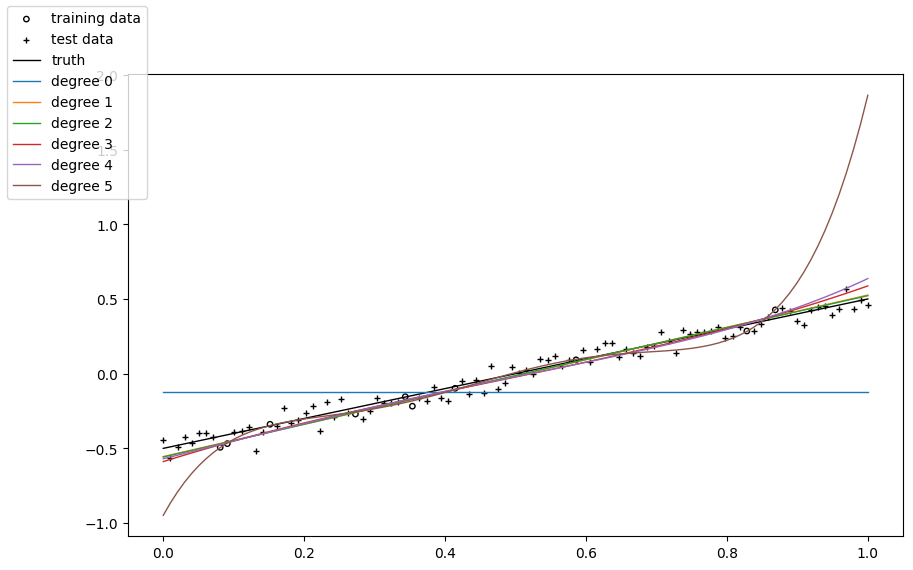

In [4]:
fig = plt.figure(figsize=(10,6))
# Plot training data.
plt.scatter(train_x, train_t, marker = 'o', s = 15,
            facecolors = 'none', edgecolors = 'k',
            label = 'training data')
# Plot test data.
plt.scatter(test_x, test_t, marker = '+', s = 15, c = 'k',
            linewidths = 1, label = 'test data')
# Plot truth.
plt.plot(p.linspace()[0], p.linspace()[1], c = 'k',
         linewidth = 1, label = 'truth')
# Highest polynomial degree + 1.
D = 6
# Fit polynomials, calculating mean and variance of the squared
# trainign error and test error and plot them.
train_mean = np.zeros(D);
train_var = np.zeros(D);
test_mean = np.zeros(D);
test_var = np.zeros(D);
for d in range(D):
  q = Polynomial.fit(train_x, train_t, d, domain = [0.0,1.0],
                     window = [0.0,1.0])
  train_error = np.square(train_t - q(train_x))
  train_mean[d] = np.mean(train_error)
  train_var[d] = np.var(train_t - q(train_x))
  test_error = np.square(test_t - q(test_x))
  test_mean[d] = np.mean(test_error)
  test_var[d] = np.var(test_t - q(test_x))
  # Large coefficients are a sign of the polynomial changing strongly.
  print(q.coef)
  plt.plot(q.linspace()[0], q.linspace()[1],
         linewidth = 1, label = 'degree ' + str(d))
fig.legend(loc='upper left')
plt.show()

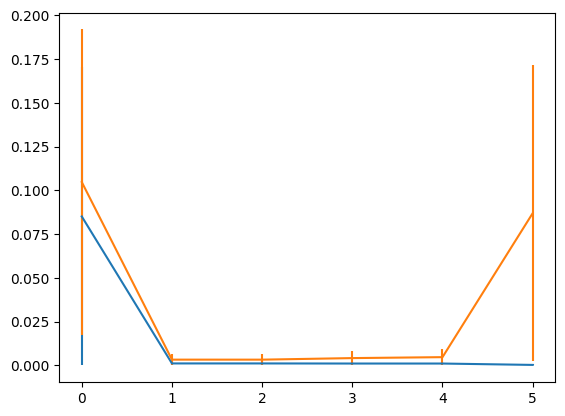

In [5]:
plt.errorbar(np.arange(D), train_mean, train_var)
plt.errorbar(np.arange(D), test_mean, test_var)
plt.show()